## Z Score method

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data=pd.read_csv('CarPricesData.csv')

In [3]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


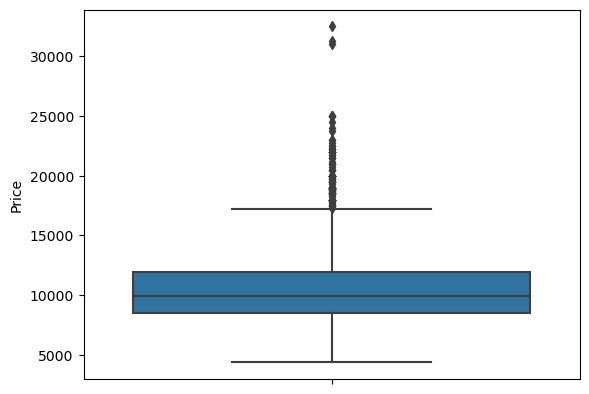

In [4]:
sns.boxplot(data=data,y='Price')
plt.show()

In [5]:
data['z_score']=stats.zscore(data.Price)

In [6]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,z_score
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0,0.763763
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0,0.832715
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0,0.887877
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0,1.163685
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0,0.832715


In [7]:
cleaned_data=data[data['z_score']<3]
cleaned_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,z_score
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0,0.763763
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0,0.832715
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0,0.887877
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0,1.163685
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0,0.832715


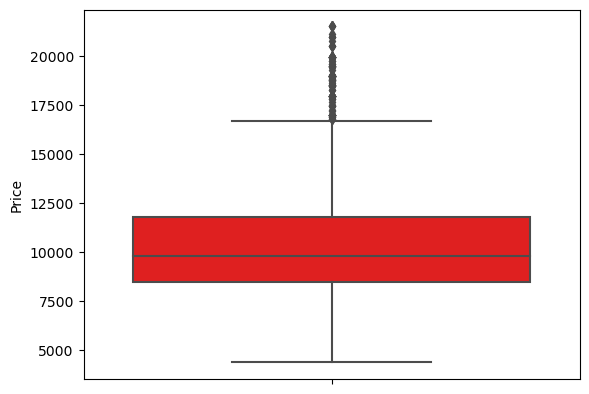

In [8]:
sns.boxplot(data=cleaned_data,y='Price',color='r')
plt.show()

## Percentile capping method

In [9]:
lower=np.nanpercentile(data.Price,5)
upper=np.nanpercentile(data.Price,95)

In [10]:
clean_data=np.clip(data.Price,lower,upper)

In [11]:
clean_data

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [12]:
df=data[data['Price']==clean_data]

In [13]:
df.shape

(1308, 11)

In [14]:
data.shape

(1436, 11)

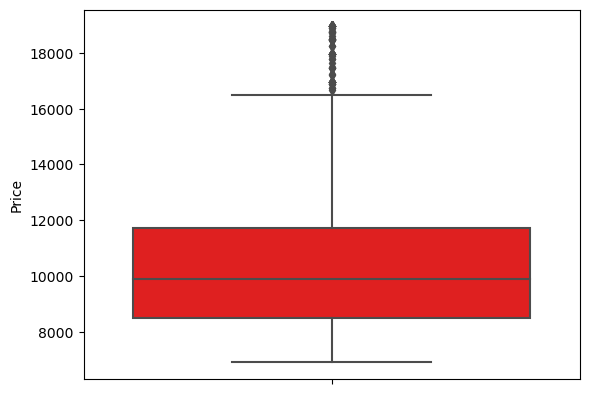

In [15]:
sns.boxplot(data=df,y='Price',color='r')
plt.show()

## Winsorization

In [16]:
import scipy.stats as sts

In [17]:
winsorized_price=sts.mstats.winsorize(data.Price,limits=[0.05,0.05])

In [18]:
winsorized_price

masked_array(data=[13500, 13750, 13950, ...,  8500,  7250,  6950],
             mask=False,
       fill_value=999999,
            dtype=int64)

In [19]:
data['winsorized_price']=winsorized_price

In [20]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,z_score,winsorized_price
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0,0.763763,13500
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0,0.832715,13750
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0,0.887877,13950
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0,1.163685,14950
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0,0.832715,13750
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0,-0.891089,7500
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0,0.031491,10845
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0,-0.615281,8500
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0,-0.960042,7250


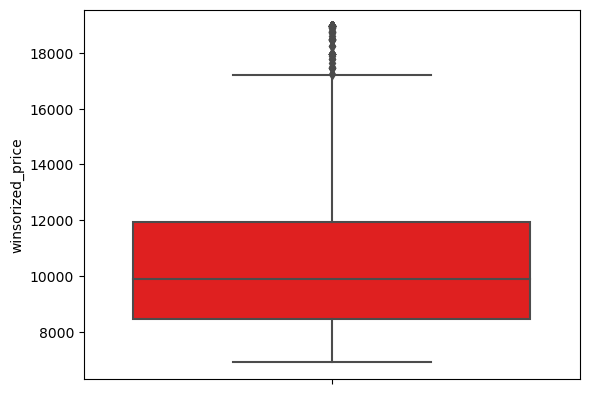

In [21]:
sns.boxplot(y=data.winsorized_price,color='r')
plt.show()